**Requirments for this notebook**
* An environment that allows Perl-compatible grepping, in some cases you may replace `-P` with `-E`.
* A Python environment with `numpy` and `matplotlib` installed.

Clean up messy `.out` file

In [11]:
!wc -l out_assignment1.out

1177 out_assignment1.out


In [12]:
!tr '\r' '\n' < out_assignment1.out > cleaned.out
!wc -l cleaned.out

34923 cleaned.out


Extract relevant data

In [13]:
!cat cleaned.out | grep -P "Epoch \d\d\d: (loss|valid_loss)" > summary.out
!cat cleaned.out | grep -P "Epoch \d\d\d: (loss|valid_loss)"

Epoch 000: loss 1.947 | lr 0.0003 | num_tokens 18.48 | batch_size 64 | grad_norm 17.8 | clip 0.9406
Epoch 000: valid_loss 2.36 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 10.6 | BLEU 6.330
Epoch 001: loss 1.575 | lr 0.0003 | num_tokens 18.48 | batch_size 64 | grad_norm 13.69 | clip 0.8961
Epoch 001: valid_loss 2.04 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 7.68 | BLEU 13.353
Epoch 002: loss 1.469 | lr 0.0003 | num_tokens 18.48 | batch_size 64 | grad_norm 13.26 | clip 0.8648
Epoch 002: valid_loss 1.93 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 6.91 | BLEU 17.906
Epoch 003: loss 1.412 | lr 0.0003 | num_tokens 18.48 | batch_size 64 | grad_norm 13.98 | clip 0.864
Epoch 003: valid_loss 1.86 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 6.41 | BLEU 16.418
Epoch 004: loss 1.375 | lr 0.0003 | num_tokens 18.48 | batch_size 64 | grad_norm 15.29 | clip 0.8735
Epoch 004: valid_loss 1.78 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 5.95 | BLEU 18.74

In [14]:
with open("summary.out", "r") as f:
    data = [ln for ln in f]

In [15]:
data[0]

'Epoch 000: loss 1.947 | lr 0.0003 | num_tokens 18.48 | batch_size 64 | grad_norm 17.8 | clip 0.9406\n'

Parse data into memory

In [16]:
import re
loss_pat = r" loss (\d+\.\d+)"
valid_loss_pat = r"valid_loss (\d+\.\d+)"
BLEU_pat = r"BLEU (\d+\.\d+)"
valid_perp_pat = r"valid_perplexity (\d+\.\d+)"

train_data = []
valid_data = []

for ln in data:
    if re.search(loss_pat, ln):
        epoch = {}
        epoch["loss"] = float(re.search(loss_pat, ln).group(1))
        train_data.append(epoch)
    elif re.search(valid_loss_pat, ln):
        epoch = {}
        epoch["valid_loss"] = float(re.search(valid_loss_pat, ln).group(1))
        epoch['BLEU'] = float(re.search(BLEU_pat, ln).group(1))
        epoch['valid_perplexity'] = float(re.search(valid_perp_pat, ln).group(1))
        valid_data.append(epoch)
        


In [17]:
train_data, valid_data

([{'loss': 1.947},
  {'loss': 1.575},
  {'loss': 1.469},
  {'loss': 1.412},
  {'loss': 1.375},
  {'loss': 1.349},
  {'loss': 1.329}],
 [{'valid_loss': 2.36, 'BLEU': 6.33, 'valid_perplexity': 10.6},
  {'valid_loss': 2.04, 'BLEU': 13.353, 'valid_perplexity': 7.68},
  {'valid_loss': 1.93, 'BLEU': 17.906, 'valid_perplexity': 6.91},
  {'valid_loss': 1.86, 'BLEU': 16.418, 'valid_perplexity': 6.41},
  {'valid_loss': 1.78, 'BLEU': 18.741, 'valid_perplexity': 5.95},
  {'valid_loss': 1.76, 'BLEU': 19.654, 'valid_perplexity': 5.81},
  {'valid_loss': 1.72, 'BLEU': 21.926, 'valid_perplexity': 5.6}])

Plot

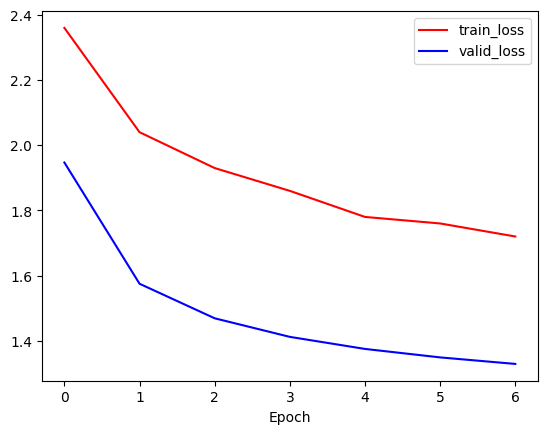

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(len(valid_data)), [d['valid_loss'] for d in valid_data], color='red')
plt.plot(np.arange(len(train_data)), [d['loss'] for d in train_data], color='blue')
plt.legend(['train_loss', 'valid_loss'])
plt.xlabel('Epoch')
plt.show()

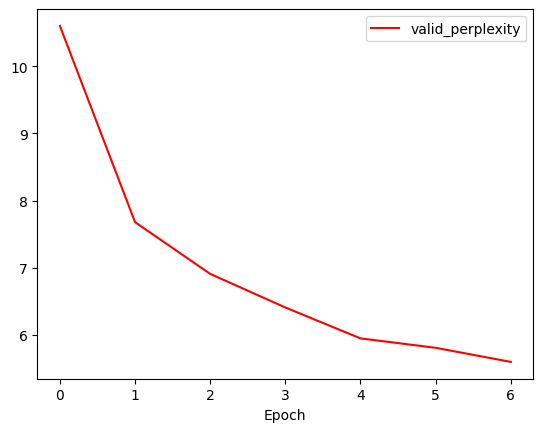

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(valid_data)), [d['valid_perplexity'] for d in valid_data], color='red')
plt.legend(['valid_perplexity'])
plt.xlabel('Epoch')
plt.show()

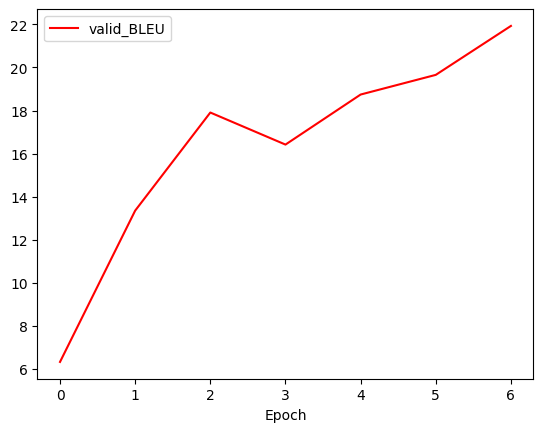

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(valid_data)), [d['BLEU'] for d in valid_data], color='red')
plt.legend(['valid_BLEU'])
plt.xlabel('Epoch')
plt.show()